# Measuring the errors in subset generation

__TODO__: COMBINE PLOTS?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
subset = pd.read_csv("C:/Users/Chloe/Documents/MaastrichtLaw&Tech/Thesis/MscThesis/sectioned_data_2022_improved.csv")
subset

,Unnamed: 0,ecli,date,inhoudsindicatie,instantie,rechtsgebied,wetsverwijzing,procesverloop,overwegingen,beslissing,year,sections
0,23,ECLI:NL:CBB:2020:1024,2020-12-22,Regeling fosfaatreductieplan 2017. Geen vergo...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Regeling fosfaatreductieplan 2017,Procesverloop Bij besluiten van 2 december 2...,"Overwegingen Artikel 8:75a, eerste lid, eers...",Beslissing Het College - wijst het verzoek om...,2020.0,[]
1,30,ECLI:NL:CBB:2020:1030,2020-12-22,"artikel 23, derde lid, van de Meststoffenwet ...",College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 3 januari 2018...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College verklaart het beroep o...,2020.0,"['1.1\nIngevolge artikel23, derde lid, van de ..."
2,31,ECLI:NL:CBB:2020:1031,2020-12-22,Meststoffenwet Appellant is er niet in geslaa...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 10 januari 201...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College verklaart het beroep o...,2020.0,"['1.1\nIngevolge artikel23, derde lid, van de ..."
3,33,ECLI:NL:CBB:2020:1033,2020-12-21,Beslissing ogv art 8:29 Awb. Beperking kennis...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Algemene wet bestuursrecht 8:29,Procesverloop Appellant heeft beroep ingeste...,"Overwegingen 1. Op grond van artikel 8:29, d...",Beslissing Het College: beslist dat beperkin...,2020.0,"['1. Op grond van artikel8:29, derde lid, Awb ..."
4,39,ECLI:NL:CBB:2020:108,2020-02-25,"Awb 6:7, 6:8 en 6:11 Bezwaar niet-ontvankelij...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van 18 mei 2018 (p...,Overwegingen 1.1. Bij het bestreden besluit ...,Beslissing Het College verklaart het beroep o...,2020.0,['1.1.\nBij het bestreden besluit heeft verwee...
...,...,...,...,...,...,...,...,...,...,...,...,...
10453,52444,ECLI:NL:RBZWB:2022:885,2022-02-22,Beëindigen bijstandsuitkering o.g.v. de parti...,Rechtbank Zeeland-West-Brabant,Bestuursrecht; Socialezekerheidsrecht,NaN,Procesverloop Verzoeker heeft bezwaar gemaak...,Overwegingen 1. Verzoeker ontving een bijsta...,Beslissing De voorzieningenrechter wijst het ...,2022.0,['1. Verzoeker ontving een bijstandsuitkering ...
10454,52451,ECLI:NL:RBZWB:2022:909,2022-02-23,WIA,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop Eiseres heeft beroep ingesteld...,Overwegingen 1.\tFeiten Eiseres is werkzaam ...,Beslissing De rechtbank verklaart het beroep ...,2022.0,['1.\tFeiten\n\n\nEiseres is werkzaam geweest ...
10455,52463,ECLI:NL:RBZWB:2022:951,2022-02-25,BBZ,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop In een besluit van 24 januari 2...,Overwegingen1.Op grond van de stukken en de b...,Beslissing De rechtbank verklaart het beroep ...,2022.0,['2. Volgens eiseres heeft het college – en da...
10456,52464,ECLI:NL:RBZWB:2022:953,2022-02-24,Compensatie transitievergoeding. Op moment d...,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop In het besluit van 15 december ...,Overwegingen Feiten 1. Bij eiseres was in die...,Beslissing De rechtbank: verklaart het beroe...,2022.0,['1. Bij eiseres was in dienst de heer [naam w...


In [3]:
# Convert the string representations of lists to actual lists
subset['sections'] = subset['sections'].apply(ast.literal_eval)

In [4]:
# Categorize each entry
def categorize_first_entry(list_entries):
    if not list_entries:  # Empty list check
        return 'Empty'
    first_entry = str(list_entries[0])
    if first_entry.startswith('1'):
        return 'Starts with 1'
    else:
        return 'Starts with other section'

In [5]:
subset['category'] = subset['sections'].apply(categorize_first_entry)

# Get counts of each category using value_counts
category_counts_subset = subset['category'].value_counts().reset_index()

# Rename the columns to more meaningful names
category_counts_subset.columns = ['category', 'count']
category_counts_subset

,category,count
0,Starts with 1,6621
1,Starts with other section,2485
2,Empty,1352


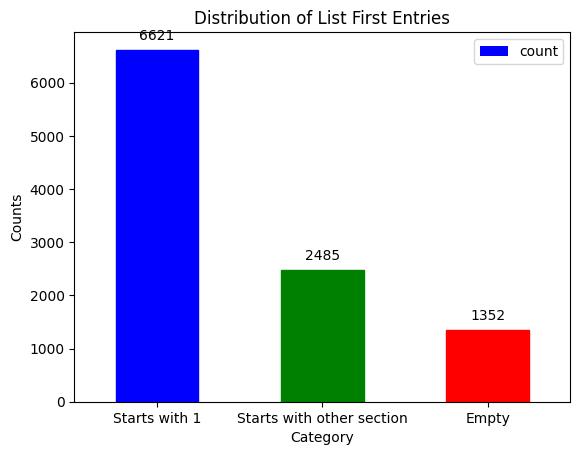

In [6]:
# Create a bar chart
ax = category_counts_subset.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of List First Entries')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keeps the category names horizontal
plt.xticks(ticks=range(len(category_counts_subset)), labels=category_counts_subset['category'])  # Label each tick

# Set colors for each bar specifically
colors = ['blue', 'green', 'red']  # Define your colors list
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)  # Set color for each bar

# Annotate each bar with the count of entries
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
plt.savefig('Stats/error_rates_subset.png')
plt.close()

In [7]:
# Calculate total number of entries
total_entries_subset = category_counts_subset['count'].sum()

# Calculate percentages for each category
category_counts_subset['percentage'] = (category_counts_subset['count'] / total_entries_subset) * 100

category_counts_subset['percentage']

0    63.310384
1    23.761714
2    12.927902
Name: percentage, dtype: float64

# Measuring errors in the full dataset

In [8]:
dataset = pd.read_csv("C:/Users/Chloe/Documents/MaastrichtLaw&Tech/Thesis/MscThesis/sectioned_data_2022_improved_fullset.csv")
dataset

,ecli,date,inhoudsindicatie,instantie,rechtsgebied,wetsverwijzing,procesverloop,overwegingen,beslissing,year,sections
0,ECLI:NL:CBB:2020:10,2020-01-07,"Artikel 23, derde en zesde lid, van de Mestst...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van 3 januari 2018...,Overwegingen 1.1 Appellante exploiteert een ...,Beslissing Het College: verklaart het beroep ...,2020.0,['1.1\n\nAppellante exploiteert een melkveehou...
1,ECLI:NL:CBB:2020:100,2020-02-18,"Fosfaatrechten. Artikel 23, derde en zesde li...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van 13 januari 201...,Overwegingen Relevante bepalingen 1.1. Ingev...,Beslissing Het College: - verklaart het beroe...,2020.0,"['1.1.\nIngevolge artikel23, derde lid, van de..."
2,ECLI:NL:CBB:2020:1001,2020-12-22,Fosfaatrechten. Knelgevallenregeling. Artikel...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 10 januari 201...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College - verklaart het beroep...,2020.0,"['1.1\nIngevolge artikel23, derde lid, van de ..."
3,ECLI:NL:CBB:2020:1002,2020-12-22,Fosfaatrechten. Knelgevallenregeling. Artikel...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 3 januari 2018...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College verklaart het beroep o...,2020.0,"['1.1\nIngevolge artikel23, derde lid, van de ..."
4,ECLI:NL:CBB:2020:1003,2020-12-22,Fosfaatrechten. Knelgevallenregeling. Uit de ...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 10 januari 201...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College: - verklaart het beroe...,2020.0,"['1.1\nIngevolge artikel23, derde lid, van de ..."
...,...,...,...,...,...,...,...,...,...,...,...
52469,ECLI:NL:RBZWB:2022:968,2022-02-25,WABOM,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop In het besluit van 7 oktober 20...,Overwegingen 1.\t[naam eiser 1] exploiteert a...,Beslissing De rechtbank: in de beroepen met ...,2022.0,['2.2\nIn de ontwerpvergunning waren voorschri...
52470,ECLI:NL:RBZWB:2022:97,2022-01-07,21/1494,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop Verzoeker heeft bij brief van 3...,Overwegingen De rechtbank doet op grond van a...,Beslissing De rechtbank veroordeelt verweerde...,2022.0,[]
52471,ECLI:NL:RBZWB:2022:970,2022-02-24,PW,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop In het besluit van 23 april 202...,Overwegingen Feiten 1. Op 27 maart 2020 heeft...,Beslissing De rechtbank verklaart het beroep ...,2022.0,['1. Op 27 maart 2020 heeft eiser een aanvraag...
52472,ECLI:NL:RBZWB:2022:977,2022-02-24,WABOA,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,Procesverloop Eiseres heeft bij brief van 10 ...,Overwegingen Feiten 1. Eiseres heeft op 19 ja...,Beslissing De rechtbank verklaart de beroepen...,2022.0,['1. Eiseres heeft op 19 januari 2021 een aanv...


In [9]:
# Convert the string representations of lists to actual lists
dataset['sections'] = dataset['sections'].apply(ast.literal_eval)

In [10]:
dataset['category'] = dataset['sections'].apply(categorize_first_entry)

# Get counts of each category using value_counts
category_counts_dataset = dataset['category'].value_counts().reset_index()

# Rename the columns to more meaningful names
category_counts_dataset.columns = ['category', 'count']
category_counts_dataset

,category,count
0,Starts with 1,33305
1,Starts with other section,12167
2,Empty,7002


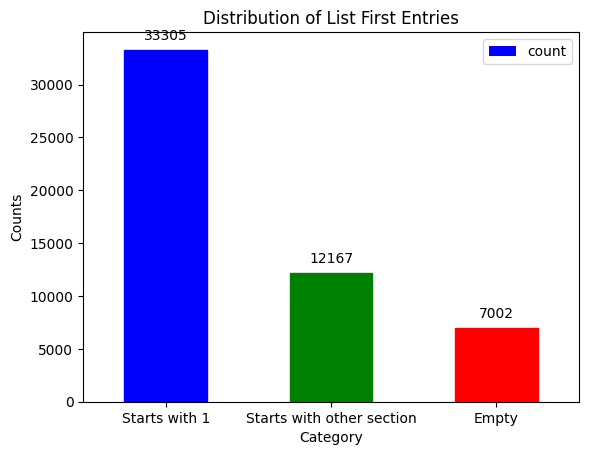

In [11]:
# Create a bar chart
ax1 = category_counts_dataset.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of List First Entries')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keeps the category names horizontal
plt.xticks(ticks=range(len(category_counts_dataset)), labels=category_counts_dataset['category'])  # Label each tick

# Set colors for each bar specifically
colors = ['blue', 'green', 'red']  # Define your colors list
for bar, color in zip(ax1.patches, colors):
    bar.set_color(color)  # Set color for each bar

# Annotate each bar with the count of entries
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
plt.savefig('Stats/error_rates_dataset.png')
plt.close()

In [12]:
# Calculate total number of entries
total_entries_dataset = category_counts_dataset['count'].sum()

# Calculate percentages for each category
category_counts_dataset['percentage'] = (category_counts_dataset['count'] / total_entries_dataset) * 100

category_counts_dataset['percentage']

0    63.469528
1    23.186721
2    13.343751
Name: percentage, dtype: float64